In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.loadtxt('and.txt', delimiter=',')
trainX = dataset[:, 0:2]
trainY = dataset[:, 2]

In [4]:
trainX

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [5]:
trainY

array([0., 0., 0., 1.])

In [9]:
from tensorflow.keras.layers import Input, Dense

# Input tensor shape is 2 because we have 2 features
input_tensor = Input(shape=(2,))
output_layer = Dense(1, activation='sigmoid', use_bias=True)

output_tensor = output_layer(input_tensor)

In [7]:
from tensorflow.keras.models import Model
model = Model(input_tensor, output_tensor)

In [8]:
model

In [10]:
from tensorflow.keras.optimizers import SGD

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1))
history = model.fit(trainX, trainY, epochs=500, batch_size=1)

Epoch 1/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3272
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3254
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3236
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3218
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3200
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3183
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3165
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3147
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3130
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3112
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3095
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3078
Epoch 13/500
4/4 [==============================] - 0s 4ms/st

In [11]:
output = model.predict(trainX)
print(np.concatenate((trainX, output), axis=1))

1/1 [==============================] - 0s 183ms/step
[[0.         0.         0.16894627]
 [0.         1.         0.28152624]
 [1.         0.         0.3845053 ]
 [1.         1.         0.54630232]]


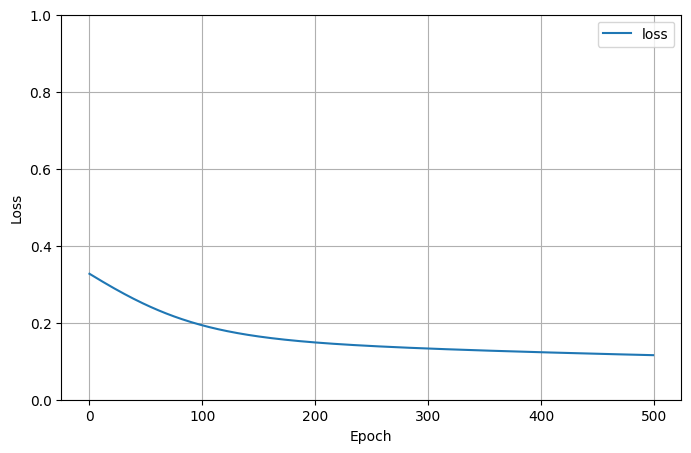

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()